<a href="https://colab.research.google.com/github/elykka/centermask2plus-colab/blob/master/Colab_CM_before_upsampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TO DO BEFORE RUNNING THE NOTEBOOK**
There are some global varaibles that must be set to ensure a smooth execution, they can be set in the cell below

These variables are:

*   **data_source**: 'google drive' or 'link' describing how the dataset is to be loaded.
*   **path_train**: path to the zip containing the training images
*   **path_val**: path to the zip containing the validation images
*   **path_test**: path to the zip containing the test images
*   **path_annotations**: path to the zip containing the annotations for training and validation sets.
* **train_name** = name of the folder containing the training images (inside zip)
* **val_name** = name of the folder containing the validation images (inside zip)
* **test_name** = name of the folder containing the test images (inside zip)
* **train_json** = name of the json file containing the annotations for training images (inside zip)
* **val_json** = name of the json file containing the annotations for training images (inside zip)

!!!NOTE: DRIVE REQUIRES USER INTERACTION. 

The selection of the drive that is to be used and a passkey (given after the selection of the drive).
The whole content of the drive will be mounted.

Make sure that colab has enough space to store the sets.

In [1]:
data_source = 'link'
path_train = 'https://www.dropbox.com/s/nicx4ug0prrw1k2/train2017_filtered.zip?dl=0'
path_val = 'https://www.dropbox.com/s/ym5hn683nowaxqj/val2017_filtered.zip?dl=0'
path_test = 'centermask/test2017.zip'
path_annotations = 'https://www.dropbox.com/s/vfxkqc3cqdh82jl/annotations.zip?dl=0'
train_name = 'train2017_filtered'
val_name = 'val2017_filtered'
test_name = 'test2017_filtered'
train_json = 'instances_train2017_filtered.json'
val_json = 'instances_val2017_filtered.json'
weights_CM = 'https://www.dropbox.com/s/6sx6mp6qjtt5imk/centermask2-V-39-eSE-FPN-ms-3x.pth?dl=0'
weights_CML = 'https://www.dropbox.com/s/353lctjaei6gw9q/centermask2-lite-V-39-eSE-FPN-ms-4x.pth?dl=0'

# **INSTALL CENTERMASK2 DEPENDENCIES**
The following blocks will:

*   install and import the dependencies for centermask2 and detectron2
*   install detectron2
*   clone centermask2 github repository for the project

In [2]:
%%script false --no-raise-error
# check the packages available
!pip freeze

In [3]:
# DEPENDENCIES

!pip install pyyaml==5.1 pycocotools>=2.0.1 imgaug==0.2.6
import torch, torchvision, cv2
# pytorch >= 1.4 and matching torchvision
print(torch.__version__, torch.cuda.is_available())
# gcc, g++ >=5
!gcc --version
assert torch.__version__.startswith("1.6")
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html

1.6.0+cu101 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html
     |████████████████████████████████| 6.6MB 4.6MB/s 
     |████████████████████████████████| 2.2MB 16.3MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.1.post20200716-cp36-none-any.whl size=42325 sha256=0b827e52717dc1e03c2ddd54abcf591eab6c4cb9c450fe6b6aa74bf9d1c44258
  Stored in directory: /root/.cache/pip/wheels/81/99/f4/42a6bef61c07b3d78dfe6d7ebff259444c4526504cf72378d7
Successfully built fvcore
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0


In [4]:
!git clone https://github.com/youngwanLEE/centermask2.git

Cloning into 'centermask2'...
remote: Enumerating objects: 164, done.
remote: Counting objects: 100% (164/164), done.
remote: Compressing objects: 100% (106/106), done.
remote: Total 164 (delta 72), reused 130 (delta 51), pack-reused 0
Receiving objects: 100% (164/164), 85.21 KiB | 2.13 MiB/s, done.
Resolving deltas: 100% (72/72), done.


# **DOWNLOAD, EXTRACT DATASETS AND GET MODELS FILES**

From drive or downloading directly from the site. 

Dowloading from a link requires that colab has enough space to store and extract the zip files.

We have chosen to adopt centermask and detectron standard paths for annotations files and train, validation, test sets.

```
centermask2/
    datasets/
        annotations/
            instances_training_images_folder_name
            instances_validation_images_folder_name
        training_images_folder_name/
        validation_images_folder_name/
```



In [5]:
instances_train = '/content/centermask2/datasets/coco/annotations/' + train_json
instances_val = '/content/centermask2/datasets/coco/annotations/' + val_json

train_folder = '/content/centermask2/datasets/coco/' + train_name +'/'
val_folder = '/content/centermask2/datasets/coco/'+ val_name +'/'
test_folder = '/content/centermask2/datasets/coco/' + test_name +'/'

In [6]:
### DOWNLOADING FROM DRIVE ###
if data_source == 'google drive':
  # The datsets that are to be used during the training/ testing need to be in a google drive
  # It will ask to open a web page to choose the drive account, allow sharing to colab and a code that is to be inserted here, under the link.
  # THE WHOLE CONTENT OF THE DRIVE WILL BE MOUNTED. 

  import zipfile
  from shutil import copyfile


  # # Add Google Drive
  # from google.colab import drive
  # drive.mount('/content/drive/')

  copyfile(weights_CM , '/centermask2-V-39-eSE-FPN-ms-3x.pth')
  copyfile(weights_CML, '/centermask2-lite-V-39-eSE-FPN-ms-4x.pth')
  copyfile('/content/drive/My Drive/' + path_train , '/train')
  copyfile('/content/drive/My Drive/' + path_val , '/val')
  copyfile('/content/drive/My Drive/' + path_annotations , '/annotations')



  train_zip = zipfile.ZipFile('/content/drive/My Drive/' + path_train)
  val_zip = zipfile.ZipFile('/content/drive/My Drive/' + path_val)
  # test_zip = zipfile.ZipFile('/content/drive/My Drive/' + path_test)
  annotations_zip = zipfile.ZipFile('/content/drive/My Drive/' + path_annotations)

  train_zip = zipfile.ZipFile('/train')
  val_zip = zipfile.ZipFile('/val')
  # test_zip = zipfile.ZipFile('/content/drive/My Drive/' + path_test)
  annotations_zip = zipfile.ZipFile('/annotations')


  # Files extraction
  train_zip.extractall('/content/centermask2/datasets/coco/')
  val_zip.extractall('/content/centermask2/datasets/coco/')
  # test_zip.extractall('/content/centermask2/datasets/coco/')
  annotations_zip.extractall('/content/centermask2/datasets/coco/')

  # Remove Google Drive
  drive.flush_and_unmount()

In [7]:
### DOWNLOADING FROM SOURCE ###

if data_source == 'link':
  
  import os
  from shutil import rmtree

  os.mkdir('/zips')

  !wget -O /zips/train_zip.zip $path_train
  !wget -O /zips/val_zip.zip $path_val
  # !wget -O /zips/test_zip.zip $path_test
  !wget -O /zips/annotations_zip.zip $path_annotations
  !wget -O /weights_CM.pth $weights_CM
  !wget -O /weights_CML.pth $weights_CML

  # Files extraction
  !unzip /zips/train_zip.zip -d /content/centermask2/datasets/coco/
  !unzip /zips/val_zip.zip -d /content/centermask2/datasets/coco/
  # !unzip /zips/test_zip.zip -d /content/centermask2/datasets/coco/
  !unzip /zips/annotations_zip.zip -d /content/centermask2/datasets/coco/

  # Delete zips to free memory
  rmtree('/zips/')

Output streaming troncato alle ultime 5000 righe.
  inflating: /content/centermask2/datasets/coco/train2017_filtered/000000565108.jpg  
  inflating: /content/centermask2/datasets/coco/train2017_filtered/000000565115.jpg  
  inflating: /content/centermask2/datasets/coco/train2017_filtered/000000565128.jpg  
  inflating: /content/centermask2/datasets/coco/train2017_filtered/000000565139.jpg  
  inflating: /content/centermask2/datasets/coco/train2017_filtered/000000565146.jpg  
 extracting: /content/centermask2/datasets/coco/train2017_filtered/000000565148.jpg  
  inflating: /content/centermask2/datasets/coco/train2017_filtered/000000565149.jpg  
  inflating: /content/centermask2/datasets/coco/train2017_filtered/000000565155.jpg  
  inflating: /content/centermask2/datasets/coco/train2017_filtered/000000565165.jpg  
  inflating: /content/centermask2/datasets/coco/train2017_filtered/000000565183.jpg  
  inflating: /content/centermask2/datasets/coco/train2017_filtered/000000565186.jpg  
 ext

# **VISUALIZE THE DATASET**

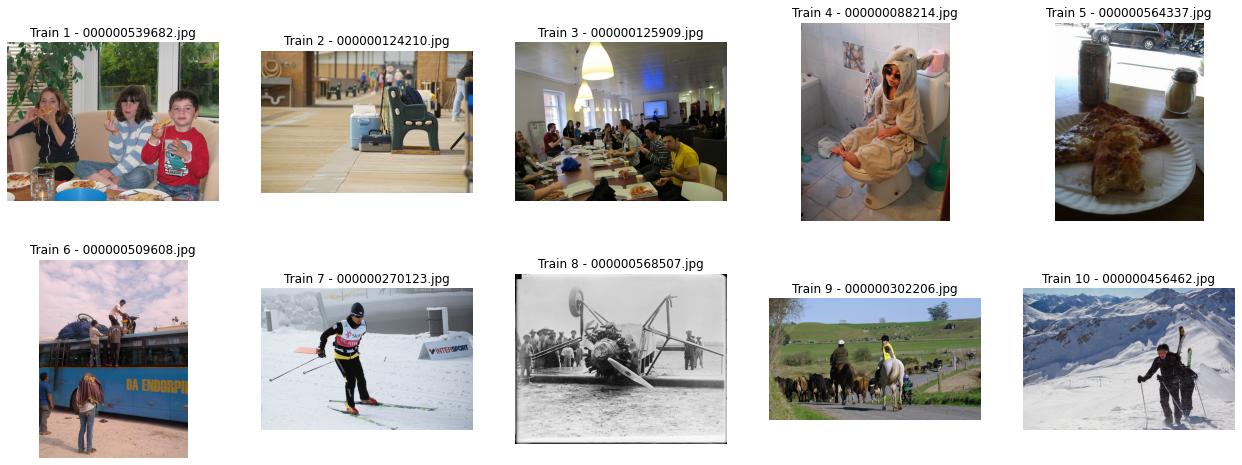

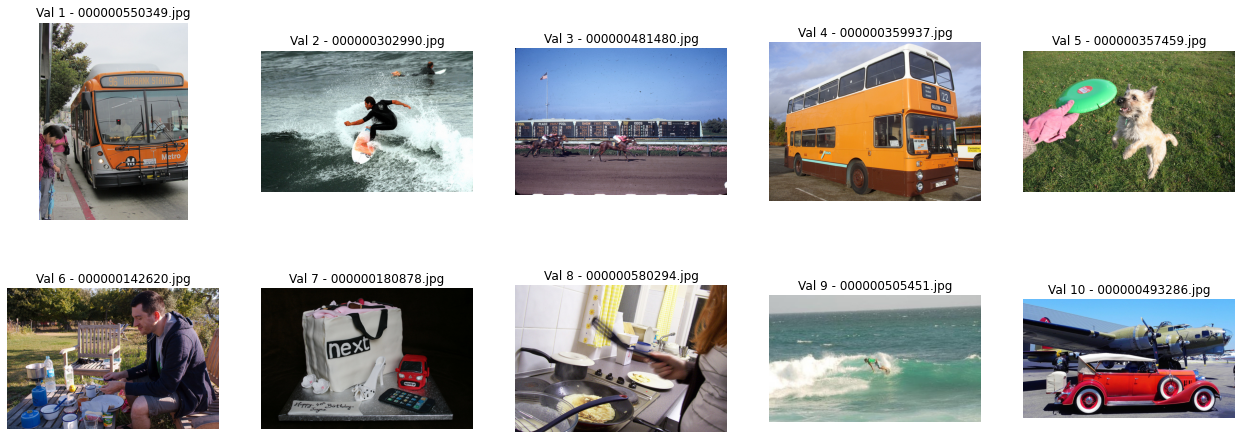

In [8]:
# VISUALIZE THE FIRST 10 IMAGES

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

train_img = os.listdir(train_folder)
val_img = os.listdir(val_folder)
# test_img = os.listdir(test_folder)

# Read the first 10 images and plot them

plt.figure(figsize=(22, 8))
for i in range(10):
	img = mpimg.imread(os.path.join(train_folder, train_img[i])) 
	plt.subplot(2, 5,i+1), plt.imshow(img), plt.title('Train ' + str(i+1) + ' - ' +  train_img[i]), plt.axis('off')
 
plt.figure(figsize=(22,8))
for i in range(10):
	img = mpimg.imread(os.path.join(val_folder, val_img[i])) 
	plt.subplot(2, 5,i+1), plt.imshow(img), plt.title('Val '+ str(i+1) + ' - ' + val_img[i]), plt.axis('off')
 
# plt.figure(figsize=(22,8))
# for i in range(10):
# 	img = mpimg.imread(os.path.join(test_folder, test_img[i])) 
# 	plt.subplot(2, 5,i+1), plt.imshow(img), plt.title('Test ' + str(i+1)+ ' - ' + test_img[i]), plt.axis('off')
 


# **REGISTER DATASETS**

In [9]:
# REGISTER COCO DATASET
from detectron2.data.datasets import register_coco_instances
register_coco_instances("my_dataset_train", {}, instances_train, train_folder)
register_coco_instances("my_dataset_val", {}, instances_val, val_folder)

In [10]:
# # Change dataset names in the chosen model 
# import yaml

# with open("/content/centermask2/configs/centermask/Base-CenterMask-VoVNet.yaml") as f:
#      file_content = yaml.safe_load(f)

# data = file_content['DATASETS']
# data['TRAIN'] = '("my_dataset_train",)'
# data['TEST'] = '("my_dataset_val",)'

# with open("/content/centermask2/configs/centermask/Base-CenterMask-VoVNet.yaml", "w") as f:
#     yaml.dump(file_content, f)


# **MODIFY PYTHON CODE FILES**

STEPS:

1.   open the file that needs to be edited with ***%pycat path/nome_file.py***
2.   copy the edited text into an empty cell and add ***%%writefile path/nome_file.py*** at the top of the cell
3.   modify code and execute the writefile cell to save the changes

!!!IMPORTANT: Leave the blocks otherwise the next runtime the repository will be cloned from scratch and all changes will be lost

# **MODIFY BACKBONE**

In [11]:
%%script false --no-raise-error
# MODIFY BACKBONE WITH DECONVOLUTION LAYERS
# detectron2.layers.ConvTranspose2d, deconvolution

# open file
%pycat /content/centermask2/centermask/modeling/backbone/vovnet.py

In [33]:
# edit and save
%%writefile /content/centermask2/centermask/modeling/backbone/vovnet.py

# Copyright (c) Youngwan Lee (ETRI) All Rights Reserved.
from collections import OrderedDict
import torch
import torch.nn as nn
import torch.nn.functional as F
import fvcore.nn.weight_init as weight_init
from detectron2.modeling.backbone import Backbone
from detectron2.modeling.backbone.build import BACKBONE_REGISTRY
from detectron2.modeling.backbone.fpn import FPN
from detectron2.layers import (
    Conv2d,
    DeformConv,
    ModulatedDeformConv,
    FrozenBatchNorm2d,
    ShapeSpec,
    get_norm,
    ConvTranspose2d # MOD2
)
from .fpn import LastLevelP6, LastLevelP6P7
#MOD3
from torchvision.utils import save_image

__all__ = [
    "VoVNet",
    "build_vovnet_backbone",
    "build_vovnet_fpn_backbone",
    "build_fcos_vovnet_fpn_backbone"
]

_NORM = False

VoVNet19_slim_dw_eSE = {
    'stem': [64, 64, 64],
    'stage_conv_ch': [64, 80, 96, 112],
    'stage_out_ch': [112, 256, 384, 512],
    "layer_per_block": 3,
    "block_per_stage": [1, 1, 1, 1],
    "eSE": True,
    "dw" : True
}

VoVNet19_dw_eSE = {
    'stem': [64, 64, 64],
    "stage_conv_ch": [128, 160, 192, 224],
    "stage_out_ch": [256, 512, 768, 1024],
    "layer_per_block": 3,
    "block_per_stage": [1, 1, 1, 1],
    "eSE": True,
    "dw" : True
}

VoVNet19_slim_eSE = {
    'stem': [64, 64, 128],
    'stage_conv_ch': [64, 80, 96, 112],
    'stage_out_ch': [112, 256, 384, 512],
    'layer_per_block': 3,
    'block_per_stage': [1, 1, 1, 1],
    'eSE' : True,
    "dw" : False
}

VoVNet19_eSE = {
    'stem': [64, 64, 128],
    "stage_conv_ch": [128, 160, 192, 224],
    "stage_out_ch": [256, 512, 768, 1024],
    "layer_per_block": 3,
    "block_per_stage": [1, 1, 1, 1],
    "eSE": True,
    "dw" : False
}

VoVNet39_eSE = {
    'stem': [64, 64, 128],
    "stage_conv_ch": [128, 160, 192, 224],
    "stage_out_ch": [256, 512, 768, 1024],
    "layer_per_block": 5,
    "block_per_stage": [1, 1, 2, 2],
    "eSE": True,
    "dw" : False
}

VoVNet57_eSE = {
    'stem': [64, 64, 128],
    "stage_conv_ch": [128, 160, 192, 224],
    "stage_out_ch": [256, 512, 768, 1024],
    "layer_per_block": 5,
    "block_per_stage": [1, 1, 4, 3],
    "eSE": True,
    "dw" : False
}

VoVNet99_eSE = {
    'stem': [64, 64, 128],
    "stage_conv_ch": [128, 160, 192, 224],
    "stage_out_ch": [256, 512, 768, 1024],
    "layer_per_block": 5,
    "block_per_stage": [1, 3, 9, 3],
    "eSE": True,
    "dw" : False
}

_STAGE_SPECS = {
    "V-19-slim-dw-eSE": VoVNet19_slim_dw_eSE,
    "V-19-dw-eSE": VoVNet19_dw_eSE,
    "V-19-slim-eSE": VoVNet19_slim_eSE,
    "V-19-eSE": VoVNet19_eSE,
    "V-39-eSE": VoVNet39_eSE,
    "V-57-eSE": VoVNet57_eSE,
    "V-99-eSE": VoVNet99_eSE,
}

def dw_conv3x3(in_channels, out_channels, module_name, postfix,
            stride=1, kernel_size=3, padding=1):
    """3x3 convolution with padding"""
    return [
        ('{}_{}/dw_conv3x3'.format(module_name, postfix),
            nn.Conv2d(in_channels, out_channels,
                      kernel_size=kernel_size,
                      stride=stride,
                      padding=padding,
                      groups=out_channels,
                      bias=False)),
        ('{}_{}/pw_conv1x1'.format(module_name, postfix),
            nn.Conv2d(in_channels, out_channels,
                      kernel_size=1,
                      stride=1,
                      padding=0,
                      groups=1,
                      bias=False)),
        ('{}_{}/pw_norm'.format(module_name, postfix), get_norm(_NORM, out_channels)),
        ('{}_{}/pw_relu'.format(module_name, postfix), nn.ReLU(inplace=True)),
    ]

class DFConv3x3(nn.Module):
    def __init__(
        self,
        in_channels,
        out_channels,
        module_name,
        postfix,
        dilation=1,
        groups=1,
        with_modulated_dcn=None,
        deformable_groups=1
        ):
        super(DFConv3x3, self).__init__()
        self.module_names = []
        self.with_modulated_dcn = with_modulated_dcn
        if self.with_modulated_dcn:
            deform_conv_op = ModulatedDeformConv
            # offset channels are 2 or 3 (if with modulated) * kernel_size * kernel_size
            offset_channels = 27
        else:
            deform_conv_op = DeformConv
            offset_channels = 18

        unit_name = f"{module_name}_{postfix}/conv_offset"
        self.module_names.append(unit_name)
        self.add_module(unit_name, Conv2d(
            in_channels,
            offset_channels * deformable_groups,
            kernel_size=3,
            stride=1,
            padding=1 * dilation,
            dilation=dilation,
        ))
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.constant_(m.weight, 0)
                nn.init.constant_(m.bias, 0)

        unit_name = f"{module_name}_{postfix}/conv"
        self.module_names.append(unit_name)
        self.add_module(f"{module_name}_{postfix}/conv", deform_conv_op(
                    in_channels,
                    out_channels,
                    kernel_size=3,
                    stride=1,
                    padding=1 * dilation,
                    bias=False,
                    groups=groups,
                    dilation=1,
                    deformable_groups=deformable_groups,
                ))
        unit_name = f"{module_name}_{postfix}/norm"
        self.module_names.append(unit_name)
        self.add_module(unit_name, get_norm(_NORM, out_channels))


    def forward(self, x):
        if self.with_modulated_dcn:
            #offset conv
            offset_mask = getattr(self, self.module_names[0])(x)
            offset_x, offset_y, mask = torch.chunk(offset_mask, 3, dim=1)
            offset = torch.cat((offset_x, offset_y), dim=1)
            mask = mask.sigmoid()
            #conv
            out = getattr(self, self.module_names[1])(x, offset, mask)
        else:
            offset = getattr(self, self.module_names[0])(x)
            out = getattr(self, self.module_names[1])(x, offset)

        return F.relu_(getattr(self, self.module_names[2])(out))



def conv3x3(in_channels, out_channels, module_name, postfix, 
              stride=1, groups=1, kernel_size=3, padding=1):
    """3x3 convolution with padding"""
    return [
        (f'{module_name}_{postfix}/conv',
         nn.Conv2d(in_channels, 
                    out_channels, 
                    kernel_size=kernel_size, 
                    stride=stride, 
                    padding=padding, 
                    groups=groups, 
                    bias=False)),
        (f'{module_name}_{postfix}/norm', get_norm(_NORM, out_channels)),
        (f'{module_name}_{postfix}/relu', nn.ReLU(inplace=True))
    ]


def conv1x1(in_channels, out_channels, module_name, postfix, 
              stride=1, groups=1, kernel_size=1, padding=0):
    """1x1 convolution with padding"""
    return [
        (f'{module_name}_{postfix}/conv',
         nn.Conv2d(in_channels, 
                    out_channels, 
                    kernel_size=kernel_size, 
                    stride=stride, 
                    padding=padding, 
                    groups=groups,
                    bias=False)),
        (f'{module_name}_{postfix}/norm', get_norm(_NORM, out_channels)),
        (f'{module_name}_{postfix}/relu', nn.ReLU(inplace=True))
    ]

class Hsigmoid(nn.Module):
    def __init__(self, inplace=True):
        super(Hsigmoid, self).__init__()
        self.inplace = inplace

    def forward(self, x):
        return F.relu6(x + 3., inplace=self.inplace) / 6.


class eSEModule(nn.Module):
    def __init__(self, channel, reduction=4):
        super(eSEModule, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Conv2d(channel,channel, kernel_size=1,
                             padding=0)
        self.hsigmoid = Hsigmoid()

    def forward(self, x):
        input = x
        x = self.avg_pool(x)
        x = self.fc(x)
        x = self.hsigmoid(x)
        return input * x


class _OSA_module(nn.Module):

    def __init__(self, 
                 in_ch, 
                 stage_ch, 
                 concat_ch, 
                 layer_per_block, 
                 module_name, 
                 SE=False,
                 identity=False,
                 depthwise=False,
                 dcn_config={},
                 ):

        super(_OSA_module, self).__init__()

        self.identity = identity
        self.depthwise = depthwise
        self.isReduced = False
        self.layers = nn.ModuleList()
        in_channel = in_ch
        if self.depthwise and in_channel != stage_ch:
            self.isReduced = True
            self.conv_reduction = nn.Sequential(
                OrderedDict(conv1x1(in_channel, stage_ch, 
                  "{}_reduction".format(module_name), "0")))
        with_dcn = dcn_config.get("stage_with_dcn", False)
        for i in range(layer_per_block):
            if self.depthwise:
                self.layers.append(
                    nn.Sequential(OrderedDict(dw_conv3x3(stage_ch, stage_ch, module_name, i))))
            elif with_dcn:
                deformable_groups = dcn_config.get("deformable_groups", 1)
                with_modulated_dcn = dcn_config.get("with_modulated_dcn", False)
                self.layers.append(DFConv3x3(in_channel, stage_ch, module_name, i, 
                    with_modulated_dcn=with_modulated_dcn, deformable_groups=deformable_groups))
            else:
                self.layers.append(nn.Sequential(OrderedDict(conv3x3(in_channel, stage_ch, module_name, i))))
            in_channel = stage_ch

        # feature aggregation
        in_channel = in_ch + layer_per_block * stage_ch
        self.concat = nn.Sequential(OrderedDict(conv1x1(in_channel, concat_ch, module_name, "concat")))

        self.ese = eSEModule(concat_ch)


    def forward(self, x):

        identity_feat = x

        output = []
        output.append(x)

        if self.depthwise and self.isReduced:
            x = self.conv_reduction(x)
        
        for layer in self.layers:
            x = layer(x)
            output.append(x)

        x = torch.cat(output, dim=1)
        xt = self.concat(x)

        xt = self.ese(xt)

        if self.identity:
            xt = xt + identity_feat

        return xt


class _OSA_stage(nn.Sequential):

    def __init__(self, 
                 in_ch, 
                 stage_ch, 
                 concat_ch, 
                 block_per_stage, 
                 layer_per_block, 
                 stage_num,
                 SE=False,
                 depthwise=False,
                 dcn_config={}):
        super(_OSA_stage, self).__init__()

        if not stage_num == 2:
            self.add_module("Pooling", nn.MaxPool2d(kernel_size=3, stride=2, ceil_mode=True))

        if block_per_stage != 1:
            SE = False
        module_name = f"OSA{stage_num}_1"
        self.add_module(module_name, _OSA_module(in_ch, 
                                                 stage_ch, 
                                                 concat_ch, 
                                                 layer_per_block, 
                                                 module_name,
                                                 SE,
                                                 depthwise=depthwise,
                                                 dcn_config=dcn_config))
        for i in range(block_per_stage - 1):
            if i != block_per_stage - 2: #last block
                SE = False
            module_name = f"OSA{stage_num}_{i + 2}"
            self.add_module(module_name,
                            _OSA_module(concat_ch, 
                                        stage_ch, 
                                        concat_ch, 
                                        layer_per_block, 
                                        module_name, 
                                        SE,
                                        identity=True,
                                        depthwise=depthwise,
                                        dcn_config=dcn_config))



class VoVNet(Backbone):

    def __init__(self, cfg, input_ch, out_features=None):
        """
        Args:
            input_ch(int) : the number of input channel
            out_features (list[str]): name of the layers whose outputs should
                be returned in forward. Can be anything in "stem", "stage2" ...
        """
        super(VoVNet, self).__init__()

        global _NORM
        _NORM = cfg.MODEL.VOVNET.NORM
            
        stage_specs = _STAGE_SPECS[cfg.MODEL.VOVNET.CONV_BODY]

        stem_ch = stage_specs["stem"]
        config_stage_ch = stage_specs["stage_conv_ch"]
        config_concat_ch = stage_specs["stage_out_ch"]
        block_per_stage = stage_specs["block_per_stage"]
        layer_per_block = stage_specs["layer_per_block"]
        SE = stage_specs["eSE"]
        depthwise = stage_specs["dw"]

        self._out_features = out_features


        # Stem module
        conv_type = dw_conv3x3 if depthwise else conv3x3
        stem = conv3x3(input_ch, stem_ch[0], "stem", "1", 2)
        stem += conv_type(stem_ch[0], stem_ch[1], "stem", "2", 1)
        stem += conv_type(stem_ch[1], stem_ch[2], "stem", "3", 2)
        self.add_module("stem", nn.Sequential((OrderedDict(stem))))
        current_stirde = 4
        self._out_feature_strides = {"stem": current_stirde, "stage2": current_stirde}
        self._out_feature_channels = {"stem": stem_ch[2]}

        stem_out_ch = [stem_ch[2]]
        in_ch_list = stem_out_ch + config_concat_ch[:-1]
        # OSA stages
        self.stage_names = []
        for i in range(4):  # num_stages
            name = "stage%d" % (i + 2) # stage 2 ... stage 5
            self.stage_names.append(name)
            self.add_module(name, _OSA_stage(in_ch_list[i],
                                             config_stage_ch[i],
                                             config_concat_ch[i],
                                             block_per_stage[i],
                                             layer_per_block,
                                             i + 2,
                                             SE,
                                             depthwise,
                                             dcn_config = {
                                                 "stage_with_dcn": cfg.MODEL.VOVNET.STAGE_WITH_DCN[i],
                                                 "with_modulated_dcn": cfg.MODEL.VOVNET.WITH_MODULATED_DCN,
                                                 "deformable_groups": cfg.MODEL.VOVNET.DEFORMABLE_GROUPS,
                                             }
            ))
            
            self._out_feature_channels[name] = config_concat_ch[i]
            if not i == 0:
                self._out_feature_strides[name] = current_stirde = int(
                    current_stirde * 2) 
                
        # DECONVOLUTION

        # initialize weights
        # self._initialize_weights()
        # Optionally freeze (requires_grad=False) parts of the backbone
        self._freeze_backbone(cfg.MODEL.BACKBONE.FREEZE_AT)


    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight)

    def _freeze_backbone(self, freeze_at):
        if freeze_at < 0:
            return
        # freeze BN layers
        for m in self.modules():
            if isinstance(m, nn.BatchNorm2d):
                freeze_bn_params(m)
        for stage_index in range(freeze_at):
            if stage_index == 0:
                m = self.stem # stage 0 is the stem
            else:
                m = getattr(self, "stage" + str(stage_index+1))
            for p in m.parameters():
                p.requires_grad = False
                FrozenBatchNorm2d.convert_frozen_batchnorm(self)

    def forward(self, x):
        ''' Args:
            input and return (dict[str->Tensor]): mapping feature name (e.g., "res5") to feature tensor.
        '''
        outputs = {}
        print(x.size())
        x = self.stem(x)
        if "stem" in self._out_features:
            outputs["stem"] = x
        for name in self.stage_names:
            x = getattr(self, name)(x)
            if name in self._out_features:
                outputs[name] = x
            #MOD4
            # if name == 'stage5':
            #   img1 = x[0][0]
            #   img2 = x[0][500]
            #   img3 = x[0][1023]
            #   print(img1.size())
            #   print(x.size())
            #   save_image(img1, 'img1.png')
            #   save_image(img2, 'img2.png')
            #   save_image(img3, 'img3.png')
            #END MOD4
        return outputs

    def output_shape(self):
        return {
            name: ShapeSpec(
                channels=self._out_feature_channels[name], stride=self._out_feature_strides[name]
            )
            for name in self._out_features
        }


@BACKBONE_REGISTRY.register()
def build_vovnet_backbone(cfg, input_shape):
    """
    Create a VoVNet instance from config.

    Returns:
        VoVNet: a :class:`VoVNet` instance.
    """
    out_features = cfg.MODEL.VOVNET.OUT_FEATURES
    return VoVNet(cfg, input_shape.channels, out_features=out_features)


@BACKBONE_REGISTRY.register()
def build_vovnet_fpn_backbone(cfg, input_shape: ShapeSpec):
    """
    Args:
        cfg: a detectron2 CfgNode

    Returns:
        backbone (Backbone): backbone module, must be a subclass of :class:`Backbone`.
    """
    bottom_up = build_vovnet_backbone(cfg, input_shape)
    in_features = cfg.MODEL.FPN.IN_FEATURES
    out_channels = cfg.MODEL.FPN.OUT_CHANNELS
    backbone = FPN(
        bottom_up=bottom_up,
        in_features=in_features,
        out_channels=out_channels,
        norm=cfg.MODEL.FPN.NORM,
        top_block=LastLevelMaxPool(),
        fuse_type=cfg.MODEL.FPN.FUSE_TYPE,
    )
    return backbone


@BACKBONE_REGISTRY.register()
def build_fcos_vovnet_fpn_backbone(cfg, input_shape: ShapeSpec):
    """
    Args:
        cfg: a detectron2 CfgNode

    Returns:
        backbone (Backbone): backbone module, must be a subclass of :class:`Backbone`.
    """
    bottom_up = build_vovnet_backbone(cfg, input_shape)
    in_features = cfg.MODEL.FPN.IN_FEATURES
    out_channels = cfg.MODEL.FPN.OUT_CHANNELS
    top_levels = cfg.MODEL.FCOS.TOP_LEVELS
    in_channels_top = out_channels
    if top_levels == 2:
        top_block = LastLevelP6P7(in_channels_top, out_channels, "p5")
    if top_levels == 1:
        top_block = LastLevelP6(in_channels_top, out_channels, "p5")
    elif top_levels == 0:
        top_block = None
    backbone = FPN(
        bottom_up=bottom_up,
        in_features=in_features,
        out_channels=out_channels,
        norm=cfg.MODEL.FPN.NORM,
        top_block=top_block,
        fuse_type=cfg.MODEL.FPN.FUSE_TYPE,
    )
    return backbone

Overwriting /content/centermask2/centermask/modeling/backbone/vovnet.py


# **MODIFY TRAINING**



In [13]:
%%script false --no-raise-error
%pycat /content/centermask2/train_net.py

In [14]:
%%writefile /content/centermask2/train_net.py
# Copyright (c) Facebook, Inc. and its affiliates. All Rights Reserved
# Modified by Youngwan Lee (ETRI), 2020. All Rights Reserved.
import logging
import os
from collections import OrderedDict
import torch
from torch.nn.parallel import DistributedDataParallel

import detectron2.utils.comm as comm
from detectron2.data import MetadataCatalog, build_detection_train_loader
from detectron2.engine import DefaultTrainer, default_argument_parser, default_setup, hooks, launch
from detectron2.utils.events import EventStorage
from detectron2.evaluation import (
    CityscapesInstanceEvaluator,
    COCOPanopticEvaluator,
    DatasetEvaluators,
    LVISEvaluator,
    PascalVOCDetectionEvaluator,
    SemSegEvaluator,
    verify_results,
)
from centermask.evaluation import COCOEvaluator
from detectron2.modeling import GeneralizedRCNNWithTTA

from detectron2.data.dataset_mapper import DatasetMapper
from centermask.config import get_cfg
from centermask.checkpoint import AdetCheckpointer
# MOD1
from detectron2.data.datasets import register_coco_instances

class Trainer(DefaultTrainer):
    """
    This is the same Trainer except that we rewrite the
    `build_train_loader` method.
    """

    def __init__(self, cfg):
        """
        Args:
            cfg (CfgNode):
        Use the custom checkpointer, which loads other backbone models
        with matching heuristics.
        """
        # Assume these objects must be constructed in this order.
        model = self.build_model(cfg)
        optimizer = self.build_optimizer(cfg, model)
        data_loader = self.build_train_loader(cfg)

        # For training, wrap with DDP. But don't need this for inference.
        # multiple GPUs
        if comm.get_world_size() > 1:
            model = DistributedDataParallel(
                model, device_ids=[comm.get_local_rank()], broadcast_buffers=False
            )
        super(DefaultTrainer, self).__init__(model, data_loader, optimizer)

        self.scheduler = self.build_lr_scheduler(cfg, optimizer)
        # Assume no other objects need to be checkpointed.
        self.checkpointer = AdetCheckpointer(
            # checkpoints saved at the same time with logs and statistics
            model,
            cfg.OUTPUT_DIR,
            optimizer=optimizer,
            scheduler=self.scheduler,
        )
        # set iterations
        self.start_iter = 0
        self.max_iter = cfg.SOLVER.MAX_ITER
        self.cfg = cfg

        # registers args hooks
        self.register_hooks(self.build_hooks())

    def train_loop(self, start_iter: int, max_iter: int):
        """
        Args:
            start_iter, max_iter (int): See docs above
        """
        logger = logging.getLogger(__name__)
        logger.info("Starting training from iteration {}".format(start_iter))

        self.iter = self.start_iter = start_iter
        self.max_iter = max_iter

        # stores metrics (loss, steps, time, etc)
        # https://detectron2.readthedocs.io/_modules/detectron2/utils/events.html
        with EventStorage(start_iter) as self.storage:
          # SimpleTrainer inheriterd methods https://detectron2.readthedocs.io/_modules/detectron2/engine/train_loop.html#SimpleTrainer
            self.before_train()
            for self.iter in range(start_iter, max_iter):
                self.before_step()
                self.run_step()
                self.after_step()
            self.after_train()

    def train(self):
        """
        Run training.

        Returns:
            OrderedDict of results, if evaluation is enabled. Otherwise None.
        """
        self.train_loop(self.start_iter, self.max_iter)

        if hasattr(self, "_last_eval_results") and comm.is_main_process():
            verify_results(self.cfg, self._last_eval_results) # boolean, True if the verification succeeds
            return self._last_eval_results

    @classmethod
    def build_train_loader(cls, cfg):
        """
        Returns:
            iterable

        It calls :func:`detectron2.data.build_detection_train_loader` with a customized
        DatasetMapper, which adds categorical labels as a semantic mask.
        """
        mapper = DatasetMapper(cfg, True)
        return build_detection_train_loader(cfg, mapper)

    @classmethod # TYPES OF EVALUATORS
    def build_evaluator(cls, cfg, dataset_name, output_folder=None):
        """
        Create evaluator(s) for a given dataset.
        This uses the special metadata "evaluator_type" associated with each builtin dataset.
        For your own dataset, you can simply create an evaluator manually in your
        script and do not have to worry about the hacky if-else logic here.
        """
        if output_folder is None:
            output_folder = os.path.join(cfg.OUTPUT_DIR, "inference")
        evaluator_list = []
        #MOD3 kept useful evaluators
        # evaluator_type = MetadataCatalog.get(dataset_name).evaluator_type
        # if evaluator_type in ["sem_seg", "coco_panoptic_seg"]:
        #     evaluator_list.append(
        #         SemSegEvaluator(
        #             dataset_name,
        #             distributed=True,
        #             num_classes=cfg.MODEL.SEM_SEG_HEAD.NUM_CLASSES,
        #             ignore_label=cfg.MODEL.SEM_SEG_HEAD.IGNORE_VALUE,
        #             output_dir=output_folder,
        #         )
        #     )
        # if evaluator_type in ["coco", "coco_panoptic_seg"]:
        #     evaluator_list.append(COCOEvaluator(dataset_name, cfg, True, output_folder))
        # if evaluator_type == "coco_panoptic_seg":
        #     evaluator_list.append(COCOPanopticEvaluator(dataset_name, output_folder))
        # if evaluator_type == "cityscapes":
        #     assert (
        #         torch.cuda.device_count() >= comm.get_rank()
        #     ), "CityscapesInstanceEvaluator currently do not work with multiple machines."
        #     return CityscapesInstanceEvaluator(dataset_name)
        # if evaluator_type == "pascal_voc":
        #     return PascalVOCDetectionEvaluator(dataset_name)
        # if evaluator_type == "lvis":
        #     return LVISEvaluator(dataset_name, cfg, True, output_folder)
        evaluator_list.append(COCOEvaluator(dataset_name, cfg, True, output_folder))
        #END MOD3

        if len(evaluator_list) == 0:
            raise NotImplementedError(
                "no Evaluator for the dataset {} with the type {}".format(
                    dataset_name, evaluator_type
                )
            )
        if len(evaluator_list) == 1:
            return evaluator_list[0]
        return DatasetEvaluators(evaluator_list)

    @classmethod
    def test_with_TTA(cls, cfg, model):
        logger = logging.getLogger("detectron2.trainer")
        # In the end of training, run an evaluation with TTA
        # Only support some R-CNN models.
        logger.info("Running inference with test-time augmentation ...")
        model = GeneralizedRCNNWithTTA(cfg, model)
        evaluators = [
            cls.build_evaluator(
                cfg, name, output_folder=os.path.join(cfg.OUTPUT_DIR, "inference_TTA")
            )
            for name in cfg.DATASETS.TEST
        ]
        res = cls.test(cfg, model, evaluators)
        res = OrderedDict({k + "_TTA": v for k, v in res.items()})
        return res

def setup(args):
    """
    Create configs and perform basic setups.
    """
    #MOD2 CHANGE CONFIGURATIONS FOR TRAINING ON 1 GPU
    cfg = get_cfg()
    cfg.merge_from_file(args.config_file)
    cfg.merge_from_list(args.opts)
    cfg.MODEL.ROI_HEADS.NUM_CLASSES = 6
    cfg.MODEL.SEM_SEG_HEAD.NUM_CLASSES = 6 
    cfg.MODEL.FCOS.NUM_CLASSES = 6
    cfg.DATASETS.TRAIN = ('my_dataset_train', )
    cfg.DATASETS.TEST = ('my_dataset_val', )
    # cfg.SOLVER.WARMUP_ITERS = 2000
    cfg.SOLVER.BASE_LR = 0.0025
    cfg.SOLVER.IMS_PER_BATCH = 2
    cfg.SOLVER.MAX_ITER = 1500
    cfg.SOLVER.STEPS = (1000, 1500)
    cfg.SOLVER.CHECKPOINT_PERIOD = 500
    #END MOD2
    cfg.freeze()
    default_setup(cfg, args)
    return cfg


def main(args):
    
    cfg = setup(args)
   
    #MOD1 REGISTER CUSTOM DATASET
    register_coco_instances("my_dataset_train", {}, '/content/centermask2/datasets/coco/annotations/instances_train2017_filtered.json',
                            '/content/centermask2/datasets/coco/train2017_filtered/')
    register_coco_instances("my_dataset_val", {}, '/content/centermask2/datasets/coco/annotations/instances_val2017_filtered.json', 
                            '/content/centermask2/datasets/coco/val2017_filtered')
    #END MOD1

    # only inference over all of the test set, loads model weights from checkpoint and saves results on output directory.
    if args.eval_only:  
        model = Trainer.build_model(cfg)
        AdetCheckpointer(model, save_dir=cfg.OUTPUT_DIR).resume_or_load(
            cfg.MODEL.WEIGHTS, resume=args.resume
        )
        evaluators = [
            Trainer.build_evaluator(cfg, name)
            for name in cfg.DATASETS.TEST
        ]
        res = Trainer.test(cfg, model, evaluators)

        if comm.is_main_process():
            verify_results(cfg, res)
        if cfg.TEST.AUG.ENABLED: #test-time augmentation
            res.update(Trainer.test_with_TTA(cfg, model))
        return res

    """
    If you'd like to do anything fancier than the standard training logic,
    consider writing your own training loop or subclassing the trainer.
    """
    trainer = Trainer(cfg)
    trainer.resume_or_load(resume=args.resume) #if True resumes training using the last_checkpoint file in the output directory (cfg ignored)
    if cfg.TEST.AUG.ENABLED: #test-time augmentation
        trainer.register_hooks( #args arguments
            [hooks.EvalHook(0, lambda: trainer.test_with_TTA(cfg, trainer.model))]
        )
    return trainer.train()


if __name__ == "__main__":
    args = default_argument_parser().parse_args()
    print("Command Line Args:", args)
    launch(
        main,
        args.num_gpus,
        num_machines=args.num_machines,
        machine_rank=args.machine_rank,
        dist_url=args.dist_url,
        args=(args,),
    )

Overwriting /content/centermask2/train_net.py


# **EVALUATION**

In [15]:
# %pycat  /content/centermask2/centermask/evaluation/coco_evaluation.py

In [16]:
# %%writefile /content/centermask2/centermask/evaluation/coco_evaluation.py


In [17]:
%%script false --no-raise-error
import torch.nn as nn
import torch
# import detectron2.layers
pool = nn.MaxPool2d(kernel_size=3, stride=2, dilation=1, padding=0, ceil_mode=True)
input = torch.tensor([[[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0],[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0],[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0],[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]], 
                      [[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0],[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0],[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0],[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]], 
                      [[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0],[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0],[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0],[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]]])
output = pool(input)
print(output)
print(output.shape)
output channels = original #rows input channels = poolex #rows
upool = nn.ConvTranspose1d(in_channels = 2, out_channels=4, kernel_size=3, stride=2)
output = upool(output)

# bilinear = nn.Upsample(size=(4,7), mode='bilinear')
# output = output.unsqueeze(0)
# output = bilinear(output)
print(output)
print(output.shape)

# **TRAINING AND EVALUATION**


In [34]:
!python /content/centermask2/train_net.py --config-file '/content/centermask2/configs/centermask/centermask_V_39_eSE_FPN_ms_3x.yaml'  --num-gpus 1 MODEL.WEIGHTS '/weights_CM.pth'

Command Line Args: Namespace(config_file='/content/centermask2/configs/centermask/centermask_V_39_eSE_FPN_ms_3x.yaml', dist_url='tcp://127.0.0.1:49152', eval_only=False, machine_rank=0, num_gpus=1, num_machines=1, opts=['MODEL.WEIGHTS', '/weights_CM.pth'], resume=False)
Config '/content/centermask2/configs/centermask/centermask_V_39_eSE_FPN_ms_3x.yaml' has no VERSION. Assuming it to be compatible with latest v2.
[08/16 19:11:41 detectron2]: Rank of current process: 0. World size: 1
/usr/local/lib/python3.6/dist-packages/setuptools/distutils_patch.py:26: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  "Distutils was imported before Setuptools. This usage is discouraged "
[08/16 19:11:42 detectron2]: Environment info:
----------------------  ---------------------------------------------------------------
sys.platform            l

In [40]:
# TO SEE SPECIFIC FEATUREMAPS
!python /content/centermask2/demo/demo.py --input '/content/centermask2/datasets/coco/val2017_filtered/000000000139.jpg' --output /results --config-file '/content/centermask2/configs/centermask/centermask_V_39_eSE_FPN_ms_3x.yaml' --opts MODEL.WEIGHTS '/weights_CM.pth'

[08/16 19:21:57 detectron2]: Arguments: Namespace(confidence_threshold=0.5, config_file='/content/centermask2/configs/centermask/centermask_V_39_eSE_FPN_ms_3x.yaml', input=['/content/centermask2/datasets/coco/val2017_filtered/000000000139.jpg'], opts=['MODEL.WEIGHTS', '/weights_CM.pth'], output='/results', video_input=None, webcam=False)
WARNING [08/16 19:21:57 d2.config.compat]: Config '/content/centermask2/configs/centermask/centermask_V_39_eSE_FPN_ms_3x.yaml' has no VERSION. Assuming it to be compatible with latest v2.
  0% 0/1 [00:00<?, ?it/s]torch.Size([1, 3, 800, 1216])
torch.Size([25, 38])
torch.Size([1, 1024, 25, 38])
/content/centermask2/centermask/modeling/fcos/fcos_outputs.py:402: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  per_candidate_nonzeros = per_candidate_inds.nonzero()
[08/16 19:22:02 


# **VISUALIZE AND SAVE OUTPUTS**

In [ ]:
# DOWNLOAD OUTPUTS
from google.colab import files
!zip -r output.zip /content/output
files.download('output.zip')

In [ ]:
# VISUALIZE TRAINING 
%load_ext tensorboard
%tensorboard --logdir /content/output/centermask/CenterMask-V-39-ms-3x

In [ ]:
# VISUALIZE PREDICTION

%cd /content/centermask2
from centermask.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from google.colab.patches import cv2_imshow

cfg = get_cfg()
cfg.merge_from_file('/content/output/centermask/CenterMask-V-39-ms-3x/config.yaml')
cfg.MODEL.WEIGHTS = '/content/output/centermask/CenterMask-V-39-ms-3x/model_final.pth'

# NOTE: detectron2 works of BGR images, ours are RGB. [:, :, ::-1] inverts the color channels.

for i in range(10):
  img = cv2.imread(os.path.join(train_folder, train_img[i])) 
  predictor = DefaultPredictor(cfg)
  outputs = predictor(img)
  v = Visualizer(img[:, :, ::-1], {}, 0.5)
  out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  cv2_imshow(out.get_image()[:, :, ::-1])

for i in range(10):
  img = cv2.imread(os.path.join(val_folder, val_img[i])) 
  predictor = DefaultPredictor(cfg)
  outputs = predictor(img)
  v = Visualizer(img[:, :, ::-1], {}, 0.5)
  out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  cv2_imshow(out.get_image()[:, :, ::-1])

